# 02 - Kernel methods and SVMs


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
import random


from skimage.color import rgb2gray
from skimage.transform import resize

from sklearn.svm import SVC
from sklearn.utils import shuffle


# 1. Image classification on Caltech 101

**a)** Download images from
http://www.vision.caltech.edu/feifeili/Datasets.htm
and run the code bellow to check the files and store the name of the classes in the list ```labelNamesAll```

(Just run)

In [15]:
## VERIFY LOCATION AND STORE LABEL NAMES

IMDIR = '101_ObjectCategories/'
labelNamesAll = []

for root, dirnames, filenames in os.walk(IMDIR):
    labelNamesAll.append(dirnames)
    #uncomment to check what is found in this folder
    #for filename in filenames:
        #f = os.path.join(root, filename)
        #if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
        #    print(f)

labelNamesAll = labelNamesAll[0]

#The list of all labels/directories is
print(labelNamesAll)

['gerenuk', 'hawksbill', 'headphone', 'ant', 'butterfly', 'lamp', 'strawberry', 'water_lilly', 'chandelier', 'dragonfly', 'crab', 'pagoda', 'dollar_bill', 'emu', 'inline_skate', 'platypus', 'dalmatian', 'cup', 'airplanes', 'joshua_tree', 'cougar_body', 'grand_piano', 'trilobite', 'brontosaurus', 'wild_cat', 'pigeon', 'dolphin', 'soccer_ball', 'wrench', 'scorpion', 'flamingo_head', 'nautilus', 'accordion', 'cougar_face', 'pyramid', 'camera', 'barrel', 'schooner', 'cellphone', 'panda', 'revolver', 'lobster', 'menorah', 'lotus', 'stapler', 'crocodile', 'chair', 'helicopter', 'minaret', 'starfish', 'ceiling_fan', 'ketch', 'mayfly', 'wheelchair', 'bass', 'yin_yang', 'crocodile_head', 'saxophone', 'beaver', 'mandolin', 'bonsai', 'Leopards', 'car_side', 'ibis', 'electric_guitar', 'kangaroo', 'stegosaurus', 'ferry', 'snoopy', 'umbrella', 'rhino', 'okapi', 'watch', 'brain', 'gramophone', 'scissors', 'rooster', 'cannon', 'binocular', 'anchor', 'octopus', 'buddha', 'laptop', 'windsor_chair', 'hed

**b. Build a reduced dataset for accelerating process.** To do so: 
- Consider only up to $K$ randomly drawn categories (start with a binary case)
- Read only up to $N$ images for each class
- Resize the images to $(imWidth*imHeight)$

The dataset should consist of a 
- Input matrix $\mathbf{X}$ of size $(K\cdot N)\times (imWidth\cdot imHeight)$ with one image in every row of the matrix. 
- Output vector $\mathbf{y}$ of size $(K\cdot N)\times 1$ with the label index of each input point in $\bf X$.
- the reduced list of the label names of size $K$ to map between the indices and the names.

**Note than different classes may have different number of images so that the actual number of $\bf X$ and $\bf y$ is less than $K*N$**

(Run and try to understand the structure of the data)

In [16]:
import os

#build DATASET from K categories and (up to) N images from category
K = 2
N = 40
imWidth = 100
imHeight = 100

#selection of label indices
X = np.zeros([K*N,imHeight*imWidth]) #data matrix, one image per row
#Y = np.zeros([K*N,1]) #label indices
Y = -np.ones([K*N,1]) #label indices
labelNames = []

#random.seed(a=42)


globalCount = 0
for i in range(K): 
    while True:
        lab = random.randint(0,len(labelNamesAll)-1)
        if lab not in labelNames:
            break
    #folders are named after the class label
    filedir = os.path.join(IMDIR,labelNamesAll[lab])
    print(filedir)

    #save the name of the class
    labelNames.append(labelNamesAll[lab])       

    classCount = 0
    for filename in os.listdir(filedir):
        f = os.path.join(filedir, filename)
        if f.endswith(('.jpg')) and (classCount < N):
            #image = skimage.io.imread(f, as_grey=True)
            image = skimage.io.imread(f, as_gray=True)
            image = skimage.transform.resize(image, [imHeight,imWidth],mode='constant')#,anti_aliasing=True)
            X[globalCount,:] = image.flatten()
            Y[globalCount,:] = i
            globalCount += 1
            classCount += 1

#Remove the unused entries of X and Y
print(globalCount)
X = X[:globalCount,:]
Y = Y[:globalCount,:]

#Check the stored classes
print(labelNames)
print(X.shape)
print(Y.T.shape)



101_ObjectCategories/stapler
101_ObjectCategories/laptop
80
['stapler', 'laptop']
(80, 10000)
(1, 80)


**c**. Split the dataset into train (80% of samples) and test (20% samples). 
(Run and try to understand the structure of the data)

In [17]:
# Split in Train and test set with 80% - 20% rule

Ntrain = np.rint(.8*Y.shape[0]).astype(int)
Ntest = Y.shape[0]-Ntrain
print('Training with', Ntrain , 'training samples and ', Ntest, 'testing samples.')

# Randomize the order of X and Y
X, Y = shuffle(X, Y, random_state=0)

# Split the data and labels into training/testing sets
X_train_ = X[0:Ntrain,:]
Y_train_ = Y[0:Ntrain,:]

X_train = X_train_[:-10,:]
Y_train = Y_train_[:-10,:]
X_val = X_train_[-10:,:]
Y_val = Y_train_[-10:,:]
X_test = X[Ntrain:,:]
Y_test = Y[Ntrain:,:]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.T)
print(Y_val.T)
print(Y_test.T)

Training with 64 training samples and  16 testing samples.
(54, 10000)
(10, 10000)
(16, 10000)
[[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1.
  1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
  0. 1. 0. 0. 0. 0.]]
[[1. 0. 0. 1. 0. 1. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.]]


**d) Training and testing a SVM
- Create an SVC model using the sklearn module, 
- train it on the train set, 
- and test it on the test set**. 

(Fill in the code and answer the questions)

**Question** SVMs are intrinsically binary classifiers, can you train the SVC for K>2? How is that achieved?

**ANSWER**: Fill your answer here


**We can train the SVC for k > 2.
there are some approaches to realize multi class classification.

**a) 1 class vs the others
A class is separated from the pther classes by linear classifier. 
Then repeat this '1 vs others' SVM for all classes.
we need n SVMs for n class classification. It is eaily implemented.


**b) pairwise classification
We make pairs of 2 classes. the nubmber of pairs will be n(n-1)/2.  Then, we apply SVMs for all pairs and apply majority vote for all combination of pairs. A data is classified into a class that gets the most vote. This algorithm have advantages to reduce computational cost, since it only needs 2 classes in a step. But compared with above algorithm, we need more SVMs.


In [18]:
# Create, train and test an svm model using the sklearn SVC
from sklearn.metrics import confusion_matrix

# FILL YOUR CODE HERE 

clf = SVC(gamma="scale")
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
#clf.score(test_x, test_y)


print("True classes",Y_test.T)
print("Predictions",Y_pred)
errors = np.sum((Y_test.ravel()!=Y_pred))
print('There were ', errors, 'errors')

True classes [[0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.]]
Predictions [0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.]
There were  1 errors


/Users/yukisaito/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**e) Fill in the functions bellow to computing different evaluation measures and give a performance report**
Look at the formulas and definitions in https://en.wikipedia.org/wiki/Evaluation_measures_(information_retrieval)

Start by computing the confusion matrix, and the values TP, TN, FP, FN, for a binary case. When considering multiple clases ($K>2$) treat one class at a time as the postive class, and the remaining classes as negative. You may want to indicate the positive class as a parameter to the indicator function.

**Question:** There are two ways of resuming the scores for a multiple class problem $K>2$, namely, the macroaverage and the microaverage. Implement and EXPLAIN them below.

**Hint** Add a numerical zero eps to the denominators to prevent dividing by zero

**ANSWER** Write your answer here


[macro average:]
In micro average, we treat the all class equally. If the number of data in each classes are almost the same, 
it can be the reasonable error metrics. But, if the number of data in each class is so different (biased), it is not prefarable.


[micro average:]
Micro average aggregate the contributions of all classes by calculating the total confusion matrix. In contrast to macro average, if there is a class inbalance, it is prefarable to use micro average. 
If a class have a much fewer examples than the other classes, the class has so little effect to claculate.
But, if you use macro avergae in this situation, the class has effect as equal as the other class, though the number of data in the class is so smaller than the others.


In [19]:
# Functions to compute the errors between prediction and ground truth 
from statistics import mean
from sklearn.metrics import confusion_matrix

def compute_measures(Y_gt,Y_pred, positiveClass=1): #Y_gt = ground truth
    #Y_gt = ground truth
    measures = dict()
    Y_len = len(Y_gt)
    eps = 1e-12
    # True positives TP : number of prediction that matches the GT
    TP = sum((Y_gt[i] == positiveClass) and (Y_pred[i]==positiveClass) for i in range(Y_len))
    # True negatives TN
    TN = sum((Y_gt[i] != positiveClass) and (Y_pred[i]!=positiveClass) for i in range(Y_len))
    # False positives FP
    FP = sum((Y_gt[i] != positiveClass) and (Y_pred[i]==positiveClass) for i in range(Y_len))
    # False negatives FN
    FN = sum((Y_gt[i] == positiveClass) and (Y_pred[i]!= positiveClass) for i in range(Y_len))
    print('TP ', TP, 'TN ', TN, 'FP', FP, 'FN', FN, 'Total', TP+TN+FP+FN)
    measures['TP'] = TP
    measures['TN'] = TN
    measures['FP'] = FP
    measures['FN'] = FN
    # Accuracy
    measures['accuracy'] = (TP+TN)/(TP+TN+FP+FN)
    # Precision  
    measures['precision'] = TP/(TP+FP+eps)
    # Specificity
    measures['specificity']= TN / (FP + TN + eps)
    # Recall
    measures['recall'] = TP / (TP + FN + eps)
    # F-measure  dice score
    measures['f1'] = 2 * measures['precision'] * measures['recall'] / (measures['recall'] + measures['precision'])
    # Negative Predictive Value
    measures['npv'] = TN / (FN + TN + eps)
    # False Predictive Value
    measures['fpr'] = FP / (FP + TN + eps)
    return measures

def micro_average(measuresList):
    microAverage = dict()
    eps = 1e-12
    
    TP = sum([dict_['TP'] for dict_ in measuresList])
    TN = sum([dict_['TN'] for dict_ in measuresList])
    FP = sum([dict_['FP'] for dict_ in measuresList])
    FN = sum([dict_['FN'] for dict_ in measuresList])
        
    # Accuracy
    microAverage['accuracy'] = (TP + TN) / (TP + FP + TN + FN)
    
    # Precision
    microAverage['precision'] = TP / (TP + FP + eps)
        
    # Specificity
    microAverage['specificity'] = TN / (FP + TN + eps)
    
    # Recall
    microAverage['recall'] = TP / (TP + FN + eps)
    
    # F-measure
    microAverage['f1'] = 2*microAverage['precision']*microAverage['recall']/(microAverage['recall']+microAverage['precision'])
    
    # Negative Predictive Value
    microAverage['npv'] = TN / (FN + TN + eps)
    
    # False Predictive Value
    microAverage['fpr'] = FP / (FP + TN + eps)
    
        
    print('Accuracy ', microAverage['accuracy'], '\n',
          'Precision', microAverage['precision'], '\n',
          'Recall', microAverage['recall'], '\n',
          'Specificity ', microAverage['specificity'], '\n',
          'F-measure', microAverage['f1'], '\n',
          'NPV', microAverage['npv'],'\n',
          'FPV', microAverage['fpr'],'\n')
    
    return microAverage

def macro_average(measuresList):
    macroAverage = dict()

    # Accuracy
    macroAverage['accuracy'] = np.mean([dict_['accuracy'] for dict_ in measuresList])
    
    # Precision
    macroAverage['precision'] = np.mean([dict_['precision'] for dict_ in measuresList])
        
    # Specificity
    macroAverage['specificity']= np.mean([dict_['specificity'] for dict_ in measuresList])
    
    # Recall
    macroAverage['recall'] = np.mean([dict_['recall'] for dict_ in measuresList])
    
    # F-measure
    macroAverage['f1'] = np.mean([dict_['f1'] for dict_ in measuresList])
    
    # Negative Predictive Value
    macroAverage['npv'] = np.mean([dict_['npv'] for dict_ in measuresList])
    
    # False Predictive Value
    macroAverage['fpr'] = np.mean([dict_['fpr'] for dict_ in measuresList])
    
    print('Accuracy ', macroAverage['accuracy'], '\n',
          'Precision', macroAverage['precision'], '\n',
          'Recall', macroAverage['recall'], '\n',
          'Specificity ', macroAverage['specificity'], '\n',
          'F-measure', macroAverage['f1'], '\n',
          'NPV', macroAverage['npv'],'\n',
          'FPV', macroAverage['fpr'],'\n')
    
    return macroAverage


**e)** Measure the performance of the SVC model for multiple classes $K>2$

First collect the measures when considering each class as positive, then, compute macro and microaverage 

Compare your results to those of sklearn metrics. 

In [20]:
def compute_measures_d(Y_gt,Y_pred, positiveClass=1):
    #Y_gt = ground truth
    measures = dict()
    Y_len = len(Y_gt)
    eps = 1e-12
    # True positives TP : number of prediction that matches the GT
    TP = sum((Y_gt[i] == positiveClass) and (Y_pred[i]==positiveClass) for i in range(Y_len))
    # True negatives TN
    TN = sum((Y_gt[i] != positiveClass) and (Y_pred[i]!=positiveClass) for i in range(Y_len))
    # False positives FP
    FP = sum((Y_gt[i] != positiveClass) and (Y_pred[i]==positiveClass) for i in range(Y_len))
    # False negatives FN
    FN = sum((Y_gt[i] == positiveClass) and (Y_pred[i]!= positiveClass) for i in range(Y_len))
    print('TP ', TP, 'TN ', TN, 'FP', FP, 'FN', FN, 'Total', TP+TN+FP+FN)
    measures['TP'] = TP
    measures['TN'] = TN
    measures['FP'] = FP
    measures['FN'] = FN
    # Accuracy
    measures['accuracy'] = (TP+TN)/(TP+TN+FP+FN)
    # Precision  
    measures['precision'] = TP/(TP+FP+eps)
    # Specificity
    measures['specificity']= TN / (FP + TN + eps)
    # Recall
    measures['recall'] = TP / (TP + FN + eps)
    # F-measure  dice score
    measures['f1'] = 2 * measures['precision'] * measures['recall'] / (measures['recall'] + measures['precision'])
    # Negative Predictive Value
    measures['npv'] = TN / (FN + TN + eps)
    # False Predictive Value
    measures['fpr'] = FP / (FP + TN + eps)
    return measures

In [24]:
#Fill in a list of measure dictionaries taking as input a different positive class

multiclass = []
#multiclass_d = []
for k in range(K):
    print('For class',labelNames[k])
    multiclass.append(compute_measures(Y_test.ravel(),Y_pred, positiveClass=k))
    #multiclass_d.append(compute_measures_d(Y_test.ravel(),Y_pred, positiveClass=k)) test code by Dawood

print('Macro-average')
macro_average(multiclass)
    
print('Micro-average')
micro_average(multiclass)
#micro_average(multiclass_d)

from sklearn.metrics import classification_report #confusion_matrix, accuracy_score, precision_score, recall_score, f1_micro, f1_macro
print(classification_report(Y_test.ravel(), Y_pred, target_names=labelNames))

For class stapler
TP  7 TN  8 FP 1 FN 0 Total 16
For class laptop
TP  8 TN  7 FP 0 FN 1 Total 16
Macro-average
Accuracy  0.9375 
 Precision 0.9374999999998828 
 Recall 0.9444444444443236 
 Specificity  0.9444444444443236 
 F-measure 0.9372549019606667 
 NPV 0.9374999999998828 
 FPV 0.055555555555549384 

Micro-average
Accuracy  0.9375 
 Precision 0.9374999999999415 
 Recall 0.9374999999999415 
 Specificity  0.9374999999999415 
 F-measure 0.9374999999999415 
 NPV 0.9374999999999415 
 FPV 0.0624999999999961 

              precision    recall  f1-score   support

     stapler       0.88      1.00      0.93         7
      laptop       1.00      0.89      0.94         9

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



**f) Show the test images as well as the the predictions (Y_pred) vs the ground truth (Y_gt) labels for the best model**
(Just run for each analysed model)

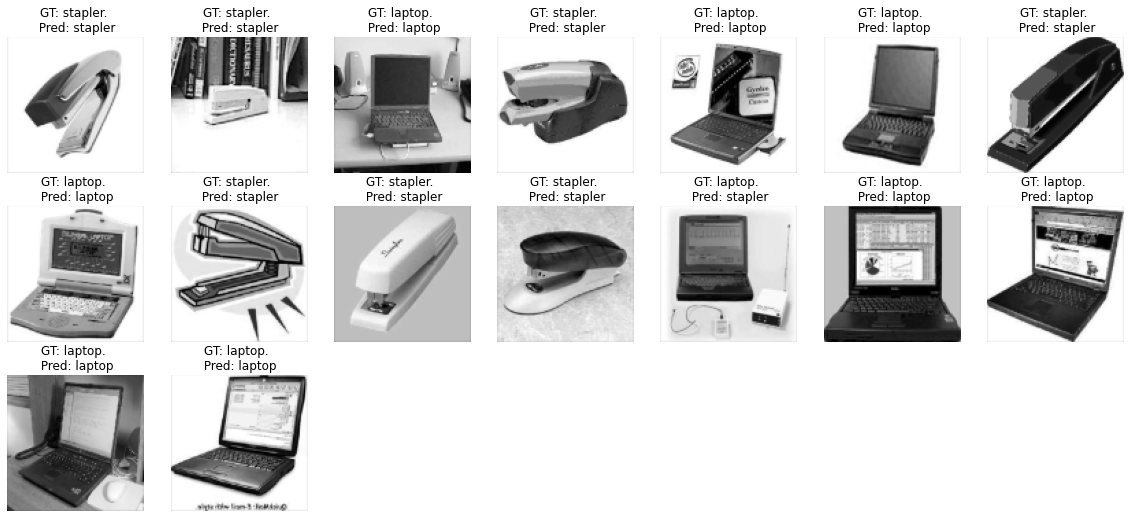

In [23]:
# Show some results
width=20
height=15
plt.rcParams['figure.figsize'] = [width, height]
fig=plt.figure()
imCounter = 1
for i in range(len(Y_test)):
    image=np.reshape(X_test[i,:], (imHeight,imWidth)) 

    plt.subplot(5,7,imCounter)
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    gtLabel = labelNames[Y_test.ravel()[i].astype(int)]
    predLabel = labelNames[Y_pred.ravel()[i].astype(int)]
    plt.title('GT: {}. \n Pred: {}'.format(gtLabel, predLabel))

    imCounter += 1
plt.show()


** g) REPORT:**  Change the kernel and other hyperparameters of your SVC trying to optimize the F1 measure for different cases. Describe in your report the different variants of the model tried. You may want to split your dataset into train, validation and test sets. Present and discuss your findings for different hyperparameters, number of classes and numbers of images. THIS IS THE MOST IMPORTANT PART FOR THE EVALUATION. 

* Report Comments: What are the best paramters that optimize the F-Measure SCore *

1st case: using poly kernel

 We split our dataset into train, val, test set with following ratio 6: 2: 2.
By GridSerach, I searched best parameter which has highest F1 score for validation set. Table1 below shows the best f1 score for test set and best hyper parameter calculated by validation data using different number of classes.

 As we saw in first jupyter-notebook (understanding part), if we increase the parameter C which control soft margin stricity, the accuracy for test and validation set is decreased. 
 And if we increase the number of classes of input data, the f1 score is decreasing as the number of classes is increasing. so, polynomial kernel seems to perform well on simple form of data (num of classes are few) and doesn't perform well on more complicated type of data. However, it really depends on training data's classes. If we used different classes for train. test, we got so diferent accuracy especially when the num of classes is 2~3. so, whether we can get good accuracy or not really depens on training data.

 In addition, Figure1 shows the relationship between different numbers of images(N) and corresponding f1 score. The number of classes is 2, cup and cellphone. I got the highest score at N=40. if N is decresing like N=30, N=20, the accuracy is decreasing too. It is considered that if we have fewer training data for each classes, the SVM lost generalization ability for test set.


        Table1 : Different number of classes and best parameter which has highest f1 score
                 using Polynomial kernel. N=40
+--------------+--------------------+--------------------+--------------------+--------------------+
| -------      | Class=2            | Class=3            | Class=4            | Class=5            |
+==============+====================+====================+====================+====================+
| class name   | cup                | revolver           | pagoda             | stegosaurus        |
|              | Cellphone          | trilobite          | pizza              | Motorbikes         |
|              |                    | ibis               | chair              | crocodile_head     |
|              |                    |                    | ibis               | bass               |
|              |                    |                    |                    | airplanes          |
+--------------+--------------------+-----------------

Text(0.2, 0.02, 'Figure1 : Different amount of images in each class and its f1 score using Polynomial kernel. \n    (number of classes is 2, cup and cellphone)')

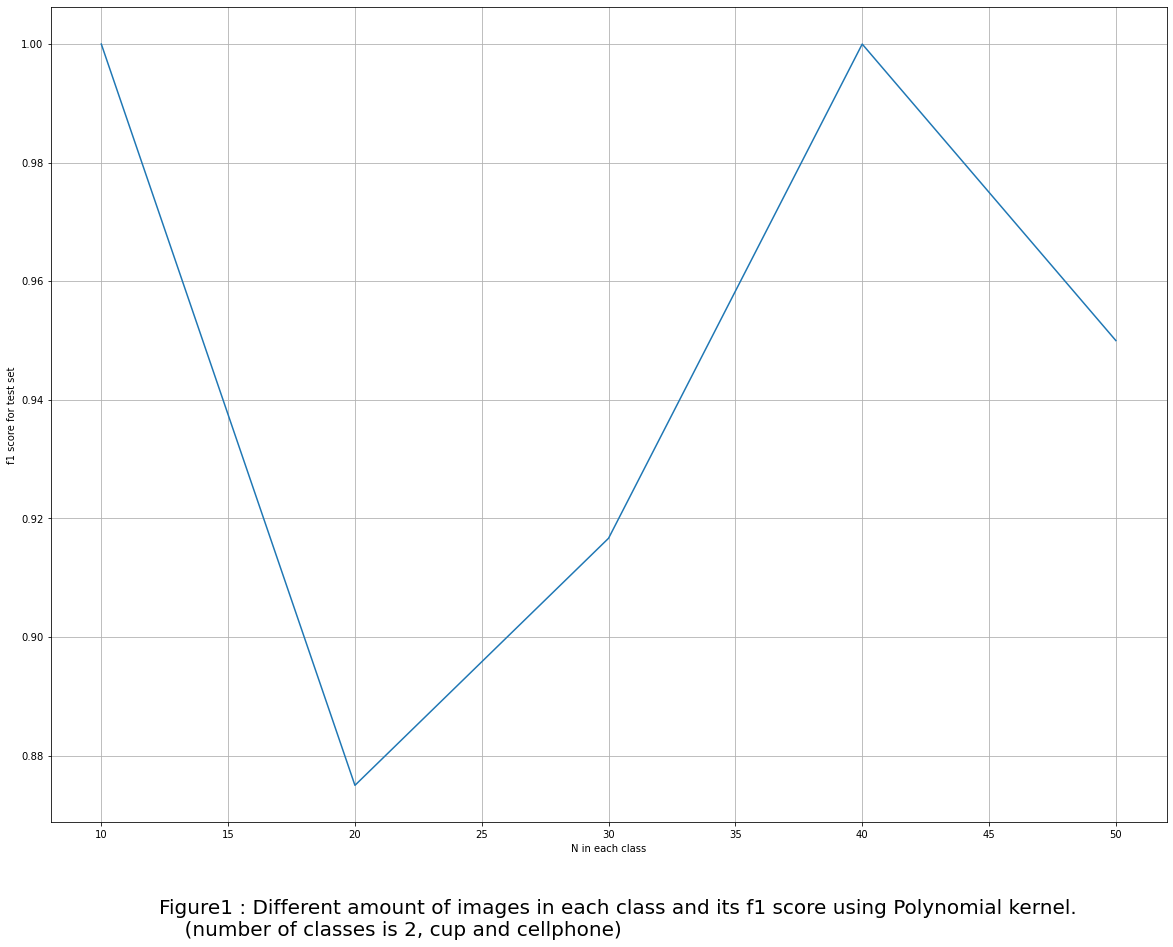

In [108]:
from tabulate import tabulate

headers = ["-------", "Class=2","Class=3","Class=4","Class=5"]
table = [['class name','cup\nCellphone','revolver\ntrilobite\nibis','pagoda\npizza\nchair\nibis','stegosaurus\nMotorbikes\ncrocodile_head\nbass\nairplanes'],
         ['   C ', 0.672335753649933,853.1678524172814, 1.4873521072935119,78.80462815669921],
         ['degree',2, 2, 2, 2],
         [' gamma',0.001, 0.0001, 0.0001, 0.0001],
         ['kernel','poly', 'poly', 'poly', 'poly'],
         ['f1 score\nfor test set',0.9999999999999376, 0.9583333333332935 , 0.5624999999999823,0.4997435897435745]
        ]
result=tabulate(table, headers, tablefmt="grid")
print('        Table1 : Different number of classes and best parameter which has highest f1 score\n                 using Polynomial kernel. N=40')
print(result)






#import matplotlib.pyplot as plt
fig = plt.figure()
left = np.array([10, 20, 30, 40, 50])
height = np.array([0.99999999999975, 0.8749999999998906 , 0.9166666666665902, 0.9999999999999376, 0.9499999999999525])
plt.plot(left, height)
plt.xlabel("N in each class")
plt.ylabel("f1 score for test set")
plt.grid(True)
title = "Figure1 : Different amount of images in each class and its f1 score using Polynomial kernel. \n    (number of classes is 2, cup and cellphone)"
fig.text(0.20, 0.02, title, fontsize=20)


In [117]:
from sklearn.decomposition import PCA

# this is utility function, by using PCA feature reduction, 
# you can see the scatter plot of data and its labels. 
# It shows a heat map for describing decision function.

def visualize_SVM(X, gt_label, pred_label):
    pca = PCA(n_components=2)
    pca.fit(X)
    pca_X = pca.transform(X)
    fig0, (ax0, ax1) = plt.subplots(1,2,figsize=(12,8))
    ax0.set_title("PCA with Correct ClassLabel")
    ax0.scatter(pca_X[:,0], pca_X[:,1], c=gt_label, cmap='spring')
    Z = clf.predict(X_test)

    ax1.set_title("PCA with SVN Result ClassLabel")
    ax1.scatter(pca_X[:,0], pca_X[:,1], c=pred_label, cmap='spring')

    x = np.linspace(np.min(pca_X[:,0])*1.2, np.max(pca_X[:,0])*1.2, 100)
    y = np.linspace(np.min(pca_X[:,1])*1.2, np.max(pca_X[:,1])*1.2, 100)
    x_g, y_g = np.meshgrid(x, y)
    #np,c_, --> inverse PCA
    before_inv_pca = np.c_[x_g.ravel(), y_g.ravel()]
    after_inv_pca = pca.inverse_transform(before_inv_pca)
    #inverse PCA 64 -> classification
    z_g = clf.decision_function(after_inv_pca)
    #reverse shape(100, 100)
    z_g = z_g.reshape(x_g.shape)
    ax0.contourf(x_g,y_g,z_g,cmap=plt.cm.coolwarm, alpha=0.8, levels=np.linspace(np.min(z_g), np.max(z_g), 100));
    plt.show()

------------validation result ----------------
best param =  {'C': 0.1373823795883264, 'degree': 4, 'gamma': 0.001, 'kernel': 'poly'}


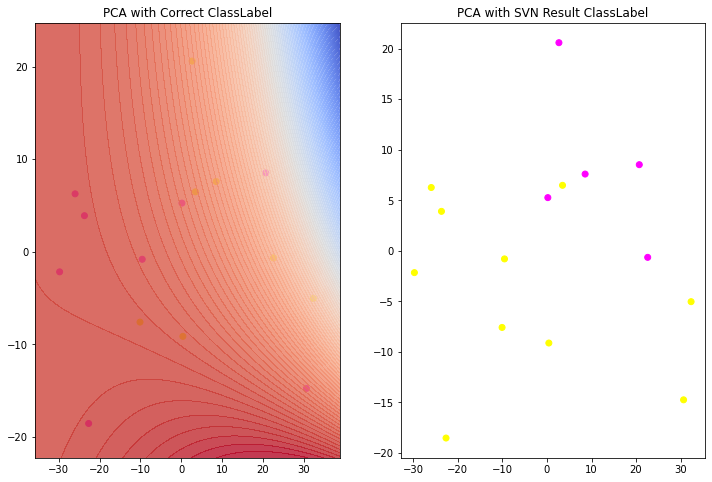

TP  2 TN  4 FP 3 FN 6 Total 15
TP  4 TN  2 FP 6 FN 3 Total 15
Micro-average
Accuracy  0.4 
 Precision 0.3999999999999733 
 Recall 0.3999999999999733 
 Specificity  0.3999999999999733 
 F-measure 0.3999999999999733 
 NPV 0.3999999999999733 
 FPV 0.59999999999996 



{'accuracy': 0.4,
 'precision': 0.3999999999999733,
 'specificity': 0.3999999999999733,
 'recall': 0.3999999999999733,
 'f1': 0.3999999999999733,
 'npv': 0.3999999999999733,
 'fpr': 0.59999999999996}

In [118]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')


max_score = 0
grid_params = {SVC():
    {"C": np.logspace(-5, 5, 30), 
     "kernel":["poly"], 
     "degree":[2, 3, 4, 5], 
     "gamma": [0.001, 0.0001]}, 
}
    
for model, param in grid_params.items():
    clf = GridSearchCV( SVC(), param, cv=5, n_jobs=-1)
    clf.fit(X_train, Y_train)
    pred_y = clf.predict(X_val)
    score = f1_score(Y_val, pred_y, average="micro")
    if max_score < score:
        max_score = score
        best_param = clf.best_params_

print('------------validation result ----------------')
print('best param = ', best_param)
clf = SVC(C = best_param['C'], degree=best_param['degree'], gamma=best_param['gamma'], kernel=best_param['kernel'])
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
visualize_SVM(X_test, Y_test.ravel(), Y_pred)

multiclass_poly = []
for k in range(K):
    multiclass_poly.append(compute_measures(Y_test.ravel(),Y_pred, positiveClass=k))
print('Micro-average')
micro_average(multiclass_poly)


2nd case: using RBF Kernel

 As well as Polynomial kernel, we check the best parameter for validation set and its f1 score for test set. Table2 shows the result with different number of classes. Note that for comparison, I used the same class data with Table1 above. The main difference is kernel is polynomial or rbf. When num of classes is small (Class=2, Class=3), I got almost the same result with polynomial kernel(Table1). However, if the number of classes is increasing (Class=4, Class=5), the f1 score got higher than that of polynomial kernel(Table1). so, it seems to be prefarable to use rbf kernel for multi class classification. In binary classification (class=2), the accuracies of both polynomial and rbf aren't changed so much.
 
 Also, Figure2 shows relationship between different numbers of images(N) and corresponding f1 score. I got almost the same graph as Figure1. Decresing amount of training data would harm the accuracy of unseen data.




     Table2 : Different number of classes and best parameter which has highest f1 score
              using rbf kernel. N=40
+--------------+--------------------+--------------------+--------------------+--------------------+
| -------      | Class=2            | Class=3            | Class=4            | Class=5            |
+==============+====================+====================+====================+====================+
| class name   | cup                | revolver           | pagoda             | stegosaurus        |
|              | Cellphone          | trilobite          | pizza              | Motorbikes         |
|              |                    | ibis               | chair              | crocodile_head     |
|              |                    |                    | ibis               | bass               |
|              |                    |                    |                    | airplanes          |
+--------------+--------------------+--------------------+---------

Text(0.2, 0.02, 'Figure2: Different amount of images in each class and its f1 score using rbf kernel. \n(number of classes is 2, cup and cellphone)')

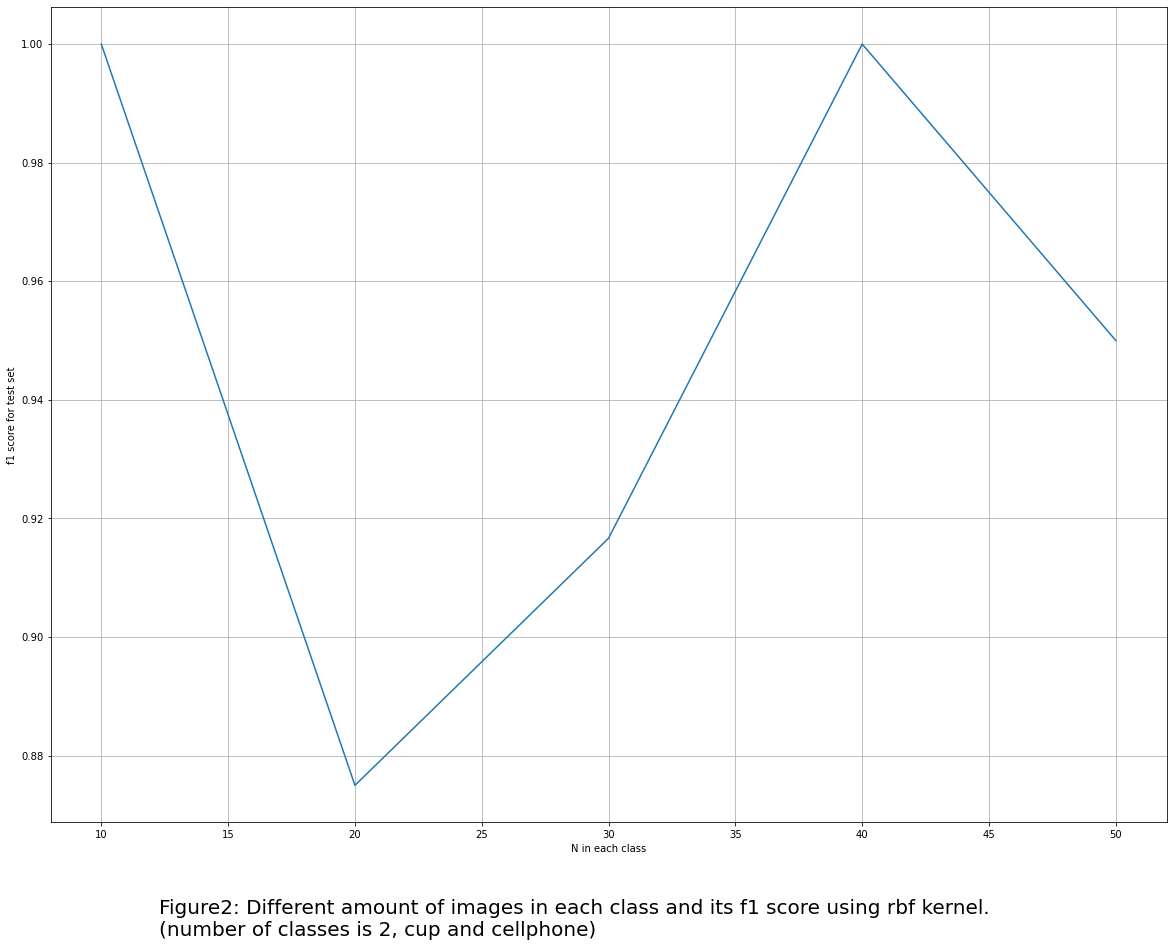

In [110]:
headers = ["-------", "Class=2","Class=3","Class=4","Class=5"]
table = [['class name','cup\nCellphone','revolver\ntrilobite\nibis','pagoda\npizza\nchair\nibis','stegosaurus\nMotorbikes\ncrocodile_head\nbass\nairplanes'],
         ['   C ', 1.4873521072935119, 16.102620275609425, 3.2903445623126713, 7.278953843983161],
         ['degree',2, 2, 2, 2],
         [' gamma',0.0001, 0.0001, 0.0001, 0.0001],
         ['kernel','rbf', 'rbf', 'rbf', 'rbf'],
         ['f1 score\nfor test set',0.9999999999999376, 0.9583333333332935, 0.6249999999999805, 0.5249999999999868]
        ]
result=tabulate(table, headers, tablefmt="grid")
print('     Table2 : Different number of classes and best parameter which has highest f1 score\n              using rbf kernel. N=40')
print(result)

fig = plt.figure()
left = np.array([10, 20, 30, 40, 50])
height2 = np.array([0.99999999999975, 0.8749999999998906,0.9166666666665902, 0.9999999999999376, 0.9499999999999525])
plt.plot(left, height2)
plt.xlabel("N in each class")
plt.ylabel("f1 score for test set")
plt.grid(True)
title = "Figure2: Different amount of images in each class and its f1 score using rbf kernel. \n(number of classes is 2, cup and cellphone)"
fig.text(0.20, 0.02, title, fontsize=20)



------------validation result ----------------
best param =  {'C': 1.4873521072935119, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}


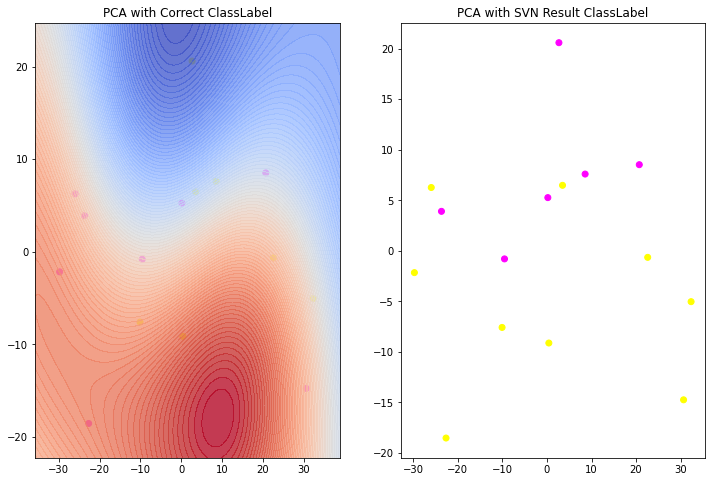

TP  4 TN  5 FP 2 FN 4 Total 15
TP  5 TN  4 FP 4 FN 2 Total 15
Micro-average
Accuracy  0.6 
 Precision 0.59999999999996 
 Recall 0.59999999999996 
 Specificity  0.59999999999996 
 F-measure 0.59999999999996 
 NPV 0.59999999999996 
 FPV 0.3999999999999733 



{'accuracy': 0.6,
 'precision': 0.59999999999996,
 'specificity': 0.59999999999996,
 'recall': 0.59999999999996,
 'f1': 0.59999999999996,
 'npv': 0.59999999999996,
 'fpr': 0.3999999999999733}

In [119]:
max_score = 0
grid_params = {SVC():
    {"C": np.logspace(-5, 5, 30), 
     "kernel":["rbf"], 
     "degree":[2, 3, 4, 5], 
     "gamma": [0.001, 0.0001]}, 
}

for model, param in grid_params.items():
    clf = GridSearchCV( SVC(), param)
    clf.fit(X_train, Y_train)
    pred_y = clf.predict(X_val)
    score = f1_score(Y_val, pred_y, average="micro")
    if max_score < score:
        max_score = score
        best_param = clf.best_params_


print('------------validation result ----------------')
print('best param = ', best_param)
clf = SVC(C = best_param['C'], degree=best_param['degree'], gamma=best_param['gamma'], kernel=best_param['kernel'])
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
visualize_SVM(X_test, Y_test.ravel(), Y_pred)

multiclass_poly = []
for k in range(K):
    multiclass_poly.append(compute_measures(Y_test.ravel(),Y_pred, positiveClass=k))
print('Micro-average')
micro_average(multiclass_poly)




In [ ]:
##this is all the parameters for scikit-learn SVC function.
help(SVC)